# 2. Clustering POIs as Commercial Centers

Using Point Clustering for POIs. This has been divided into 4 categories :<BR><BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     1) Data Analysis of the POI data.<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     2) Optimizing clustering algorithm to obtain suitable eps (epsilon for point distance).<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3) Clustering the POIs after using the optimized eps.<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    4) Removing the noise and outliers from the clusters.

In [1]:
import numpy as np
import libpysal as lp
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading POIs data to GeoDataFrame :

In [2]:
listings = gpd.read_file('Data (ESRI Shapefiles)/Delhi_POI.shp')
listings.crs = {'init':'epsg:4269'}
listings = listings.to_crs(epsg=3857)

## 1) POI Data Analysis

In [3]:
listings.head()

,Company,Category,Longitude,Latitude,geometry
0,Cafe Coffee Day,cafe,77.151895,28.533492,POINT (8588509.631740265 3316402.95457807)
1,"ICICI, SBI, Citibank,",bank,77.152001,28.533647,POINT (8588521.465002131 3316422.619973167)
2,Heritage International School,school,77.166546,28.508450,POINT (8590140.606995722 3313230.223451301)
3,Deep Public School,school,77.163482,28.511716,POINT (8589799.512943983 3313643.94085898)
4,Temple,place_of_worship,77.175677,28.505700,POINT (8591157.031870304 3312881.921785489)


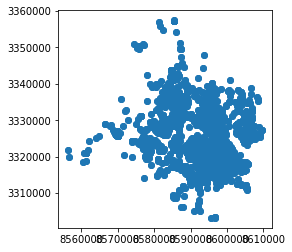

In [4]:
listings.plot()
plt.show()

Number of POIs observed : 7388<BR>
Number of Categories : 95

In [5]:
#The following were the identified "tags" or "categories" :
Categories = []
for line in listings['Category']:
    if line not in Categories:
        Categories.append(line)
        continue
#print(Categories)

<TABLE>
<TR>
<TD>arts_centre</TD>
<TD>atm</TD>
<TD>Ayurvedic Hospital</TD>
<TD>baby_hatch</TD>
<TD>bank</TD>
<TD>bar</TD>
<TD>bench</TD>
</TR><TR>
<TD>bicycle_parking</TD>
<TD>bicycle_rental</TD>
<TD>bicycle_repair_station</TD>
<TD>blood_bank</TD>
<TD>bureau_de_change</TD>
<TD>bus_station</TD>
<TD>cafe</TD>
</TR><TR>
<TD>cafe;coworking_space</TD>
<TD>car_rental</TD>
<TD>car_wash</TD>
<TD>charging_station</TD>
<TD>cinema</TD>
<TD>clinic</TD>
<TD>club</TD>
</TR><TR>
<TD>college</TD>
<TD>community_centre</TD>
<TD>conference_centre</TD>
<TD>courthouse</TD>
<TD>coworking_space</TD>
<TD>crematorium</TD>
<TD>dentist</TD>
</TR><TR>
<TD>disused</TD>
<TD>doctors</TD>
<TD>Drinking_Water</TD>
<TD>drinking_water</TD>
<TD>driving_school</TD>
<TD>embassy</TD>
<TD>events_venue</TD>
</TR><TR>
<TD>fast_food</TD>
<TD>fast_food;bar</TD>
<TD>fire_station</TD>
<TD>food_court</TD>
<TD>fountain</TD>
<TD>fuel</TD>
<TD>Garbage Collection Units</TD>
</TR><TR>
<TD>grave_yard</TD>
<TD>hospital</TD>
<TD>House</TD>
<TD>ice_cream</TD>
<TD>internet_cafe</TD>
<TD>kindergarten</TD>
<TD>language_school</TD>
</TR><TR>
<TD>library</TD>
<TD>marketplace</TD>
<TD>meditation_centre</TD>
<TD>memorial</TD>
<TD>money_transfer</TD>
<TD>motorcycle_parking</TD>
<TD>music_school</TD>
</TR><TR>
<TD>nightclub</TD>
<TD>nursing_home</TD>
<TD>orphanage</TD>
<TD>parking</TD>
<TD>parking_space</TD>
<TD>payment_centre</TD>
<TD>payment_terminal</TD>
</TR><TR>
<TD>pharmacy</TD>
<TD>photo_booth</TD>
<TD>place_of_worship</TD>
<TD>police</TD>
<TD>post_box</TD>
<TD>post_depot</TD>
<TD>post_office</TD>
</TR><TR>
<TD>pub</TD>
<TD>public_bath</TD>
<TD>public_building</TD>
<TD>recycling</TD>
<TD>restaurant</TD>
<TD>school</TD>
<TD>shelter</TD>
</TR><TR>
<TD>social_centre</TD>
<TD>social_facility</TD>
<TD>studio</TD>
<TD>swimming_pool</TD>
<TD>taxi</TD>
<TD>telephone</TD>
<TD>theatre</TD>
</TR><TR>
<TD>toilets</TD>
<TD>training</TD>
<TD>tuition</TD>
<TD>university</TD>
<TD>vending_machine</TD>
<TD>veterinary</TD>
<TD>waste_basket</TD>
</TR><TR>
<TD>waste_disposal</TD>
<TD>waste_transfer_station</TD>
<TD>water_point</TD>
<TD>weighbridge</TD>
</TR>
</TABLE>

## 2) Optimizing clustering algorithm for eps

Using scikit-learn cluster module to identify these clusters using Point Clustering :

In [6]:
import sklearn.cluster as skc

Since we're interested in the locations and sklearn isn't conversant in geodataframes, we'll need to get the point array from the geodataframe:

In [7]:
coordinates = listings['geometry'].apply(lambda p: np.hstack(p.xy)).values
coordinates = np.vstack(coordinates)

Using a local density-based scan clusterer; DBSCAN. It works by fitting clusters of nearby points using the eps distance, which is the furthest distance at which points are considered to be in each other's clusters.

In [8]:
#Code has been commented as the value for eps is yet to be calculated.
#clusterer = skc.DBSCAN(eps=x).fit(coordinates)

To find a value for epsilon (eps=x) which defines the maximum distance between two points.<BR><BR>
Using the Optimization algorithm defined in this research paper : https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf <BR><BR>
<img src="Images/optimize.png"> 

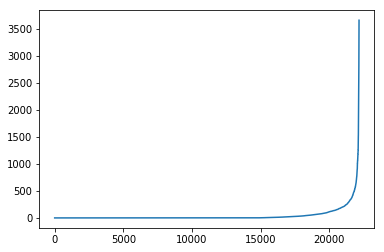

In [9]:
import math
import matplotlib.pyplot as plt

distances = []
for i in coordinates:
    tempdist = []
    for j in coordinates:
        tempdist.sort()
        dist = math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
        if len(tempdist)<3:
            tempdist.append(dist)
        else:
            if tempdist[2]>dist:
                tempdist[2]=dist
    distances.append(tempdist[0])
    distances.append(tempdist[1])
    distances.append(tempdist[2])

distances.sort()
plt.plot(distances)
plt.show()

Hence, from the obtained graph, we observe the maximum curvature in the range 300-500. Taking the upper band to allow shops located further away to be included in the Commercial Center, we take <B>eps=500</B>.

## 3) Clustering the POIs

Clustering the POIs after obtaining the optimized eps of 500. Plotting the clusters and removing the "noise".

In [10]:
clusterer = skc.DBSCAN(eps=500).fit(coordinates)

Clusters have been obtained and contains all of the observations found to be components of clusters:

In [11]:
clusterer.components_

array([[8588509.63174026, 3316402.95457807],
       [8588521.46500213, 3316422.61997317],
       [8590140.60699572, 3313230.2234513 ],
       ...,
       [8593957.39611265, 3329072.7402738 ],
       [8598796.12041896, 3317294.00851517],
       [8599321.80445033, 3317258.2106198 ]])

The indices of the observations found to be "cores" of the clusters detected:

In [12]:
clusterer.core_sample_indices_

array([   0,    1,    2, ..., 7383, 7385, 7386], dtype=int64)

Identified their labels, which are the quantity of interest here, the main thing we wanted to detect:

In [13]:
clusterer.labels_

array([ 0,  0,  1, ..., 21, 21, -1], dtype=int64)

The number of discovered clusters is contained in the p attribute. 

In [14]:
nclusters = clusterer.p

To map the clusters, we need to assign them back to the dataframe and plot them:

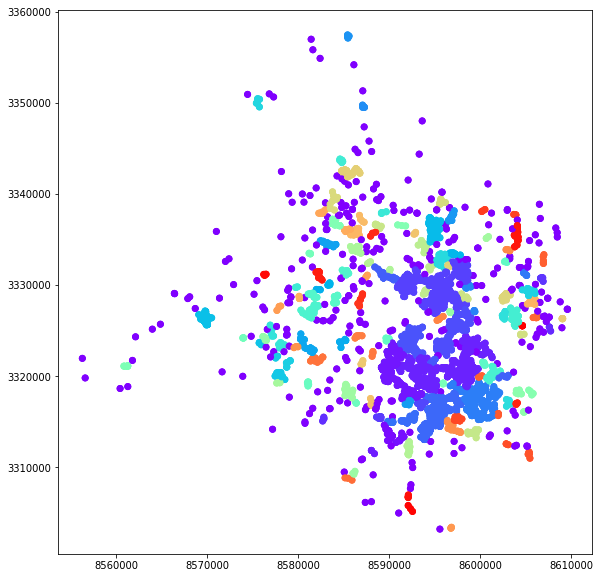

In [15]:
listings.assign(labels=clusterer.labels_).plot('labels', k=nclusters, cmap='rainbow',figsize=(10, 10))

## 4) Removing the "noise" from the data :

In [16]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas

noise = []
max_cls = 0
for xj in range(len(clusterer.components_)):
    if clusterer.labels_[xj] > -1: #Removing Cluster Labels "-1" to filter out the noise.
        noise.append([clusterer.components_[xj][0],clusterer.components_[xj][1],clusterer.labels_[xj]])
        if int(clusterer.labels_[xj]) > max_cls:
            max_cls = int(clusterer.labels_[xj])
noisedf = pd.DataFrame(noise, columns = ['Lon', 'Lat', 'Cls'])
noisedf['geometry'] = noisedf.apply(lambda x: Point((float(x.Lon), float(x.Lat))), axis=1)
noisedf = geopandas.GeoDataFrame(noisedf, geometry='geometry')

In [17]:
noisedf.head() #Cls column is the assigned cluster

,Lon,Lat,Cls,geometry
0,8.588510e+06,3.316403e+06,0,POINT (8588509.631740265 3316402.95457807)
1,8.588521e+06,3.316423e+06,0,POINT (8588521.465002131 3316422.619973167)
2,8.590141e+06,3.313230e+06,1,POINT (8590140.606995722 3313230.223451301)
3,8.589800e+06,3.313644e+06,1,POINT (8589799.512943983 3313643.94085898)
4,8.591157e+06,3.312882e+06,2,POINT (8591157.031870304 3312881.921785489)


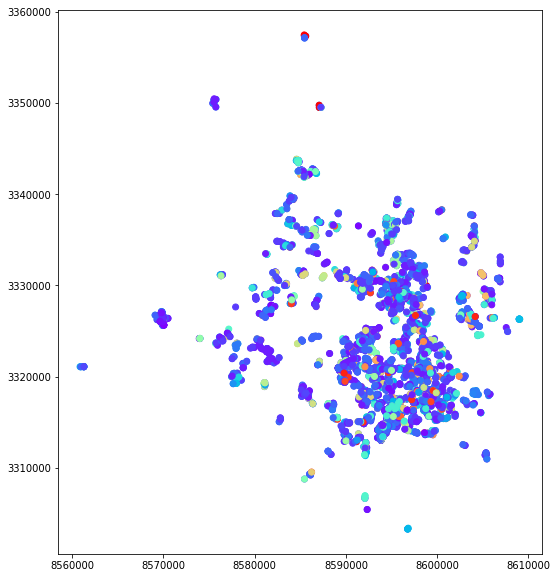

In [18]:
noisedf.plot('Cls', cmap='rainbow',figsize=(10, 10))

### Total Number of Clusters :

In [19]:
max_cls

131

Hence, the clusters have been obtained. A total of 131 Commercial Centers have been identified and Clustered.